In [4]:
# Created: 20250104

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:



# Step 2: Calculate Ease of Movement (EOM)
def calculate_eom(data, period=14):
    # Midpoint Move
    data['Midpoint Move'] = ((data['High'] + data['Low']) / 2) - ((data['High'].shift(1) + data['Low'].shift(1)) / 2)
    
    # Box Ratio
    data['Box Ratio'] = data['Volume'] / (data['High'] - data['Low'])
    data['Box Ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division by zero
    
    # EOM
    data['EOM'] = data['Midpoint Move'] / data['Box Ratio']
    
    # Smoothed EOM
    data['Smoothed EOM'] = data['EOM'].rolling(window=period).mean()
    
    return data

In [6]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply EOM calculation
    data = calculate_eom(data)
    
    # Step 3: Plot Close Price and EOM
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot EOM
    plt.subplot(2, 1, 2)
    plt.plot(data['Smoothed EOM'], label='Smoothed EOM', color='green', linewidth=1.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
    plt.title(f'Ease of Movement (EOM) for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('EOM')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1266648/365060863.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Box Ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division by zero


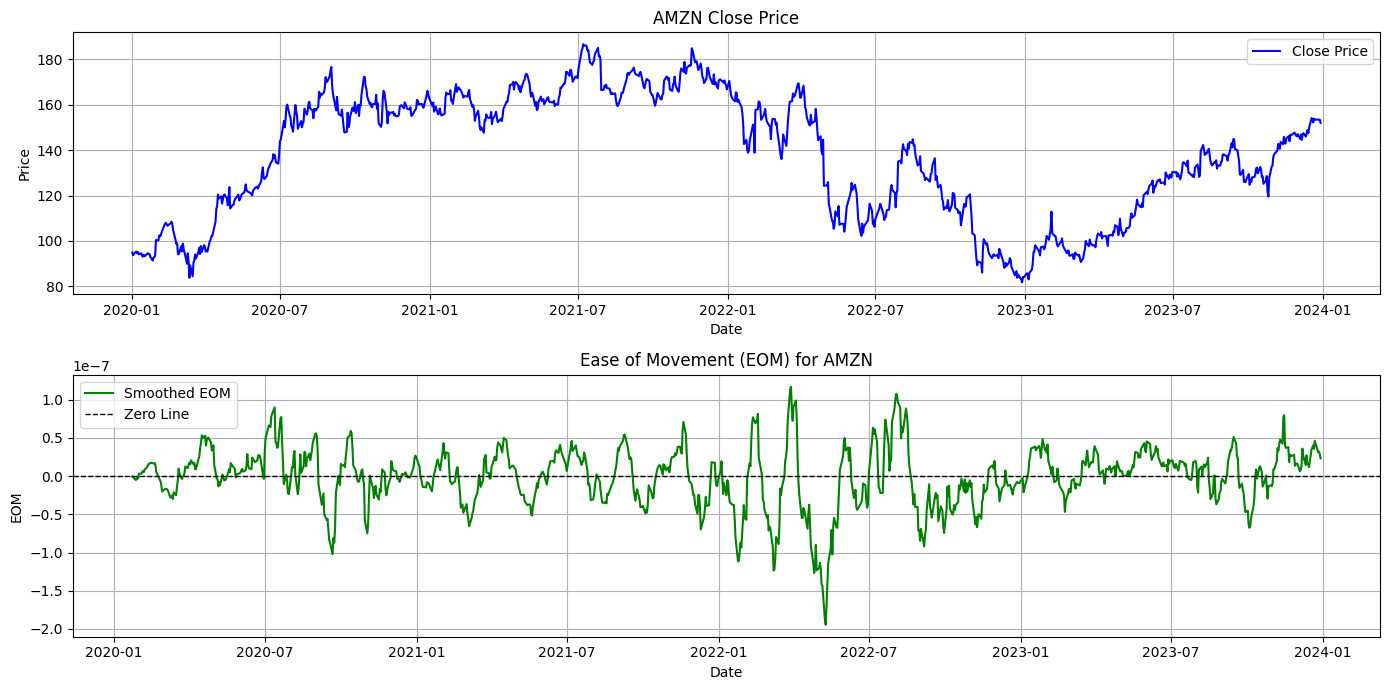

In [7]:
show_graph("AMZN")